# Building Deep Learning Neural Networks in Keras -- One Lego Block at a Time

In this notebook, we'll use **Keras** to build deep learning neural network models from scratch -- layer by layer, block by block. **Python + deep learning -- like Legos for your brain**. We'll walk through the process of building, tuning, and understanding neural networks from setting up the simplest architecture to experimenting with hyperparameters and visualizing learning.

In the process, we’ll see not just what works, but why (and what breaks along the way). Think of it as a beginner-friendly blueprint for deep learning -- a peek under the hood. In the end, we'll build a neural network with nearly **2 million trainable parameters** and explore an intuitive and powerful deep learning technique called **Dropout**.

**Acknowledgments**

This notebook is based on a lecture delivered by Tao Li, Associate Professor in the Department of Information & Analytics at Santa Clara University's Leavey School of Business. Thanks to the professor for providing this deep dive into deep learning.

## Import the libraries

In [1]:
# Start with the imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Build the neural network

Now, to start building the model. We begin by impprting `Sequential` and then get to stacking.

In [2]:
# Import the main building blocks: Sequential for stacking layers, 
# Dense for fully connected layers, and Activation functions
from keras.models import Sequential
from keras.layers import Dense, Activation

# Initialize a Sequential model — this means we'll stack layers one after another, like Legos
model = Sequential([
    # Create the first hidden layer: 32 neurons, expects 784 (or 28x28) input values -- like a flattened image
    Dense(32, input_shape=(784,)),
    # Add ReLu to help the network learn better
    Activation('relu'),
    # Add the second layer: 10 neurons for 10 possible outcome classes (the numbers 0 to 9!)
    Dense(10),
    # Turn the outputs into probabilities with softmax
    Activation('softmax'),
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


The above block of code is *one* way to create a neural network with one hidden layer of 32 neurons and one output layer with 10 neurons. Now, let's take a look at a couple of other ways to create highly similar neural networks.

In [3]:
# Create an empty sequential network and add the layers one by one
# Note: We are using the .add() method
model = Sequential()
model.add(Dense(32, input_dim=784))
model.add(Activation('relu'))

Next, we'll add `softmax` into the output layer.

In [4]:
# Note: For this version, the activation function is one of the parameters
# that needs to be set within the dense layer
# Also note: We've added softmax as the activation function for the output layer
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

Adding `softmax` is crucial for multi-class problems like digit recognition because it turns outputs into class probabilities (so the model can pick the most likely digit).

Having run through those examples, let's return to the original model we built as we progress through the pipeline.

In [5]:
# Share the same model from above
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

We'll use the `.compile()` method to get thee model ready for training, using the Adam optimizer for efficient weight updates, categorical crossentropy as the loss function for multi-class classification, and accuracy as our metric as we are working with a balanced dataset.

In [10]:
# Use .compile() to set "adam" as the optimizer and set "categorical_crossentropy"
# as the loss function; Finally use "accuracy" as the metric
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

Let's take a look at the summary of our model that has three layers: the input layer, the hidden layer and the output layer.

In [11]:
# Dispaly the model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

The first layer alone has **over 25,000 parameters**, since every one of the 784 input pixels connects to all 32 hidden neurons. An important note: the total number of parameters (25,450), not the number of layers or neurons is what determines the complexity of the neural network.

## Import and split the dataset

Now, to load up a classic dataset -- **MNIST**, a collection of 70,000 handwritten digits (60,000 for training, 10,000 for testing). Each image is 28x28 pixels and labeled with a digit from 0 to 9.

In [12]:
# Import the dataset, mnist and also import tensorflow from keras
# Note: mnist is a collection 60,000 handwritten digit images -- a clasic demo for deep learning
from keras.datasets import mnist
from tensorflow import keras

# Load the dataset and automatically split the training and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [13]:
# Flatten 28x28 images into 784-length vectors
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Turn the pixel values to float32 for compatibility
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Scale pixel values to [0, 1] range -- aka we are normalizing the data
X_train /= 255
X_test /= 255

# Display the number of training and test samples
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# Set the number of possible digit classes -- 0 through 9
num_classes = 10

# Transform digit labels into one-hot encoded vectors
# For example: 3 = [0,0,0,1,0,0,0,0,0,0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


## Train, validate and test the model

Let's begin by fitting the model using the training set.

In [14]:
# Fit the mode on the training set with a batch size of 128 images and run 10 epochs, or passes through the data
# Note: We use verbose=1 to print progress after each step
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7642 - loss: 0.8211
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.9240 - loss: 0.2698
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9373 - loss: 0.2225
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9491 - loss: 0.1837
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.9550 - loss: 0.1603
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.9607 - loss: 0.1397
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9629 - loss: 0.1290
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.9666 - loss: 0.1165
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - accuracy: 0.9698 - loss: 0.1085
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step - accuracy: 0.9723 - loss: 0.0982


Notice that the accuracy on the training set is going up and the training loss is going down. A sign that **the model is learning successfully from the data**. Next, we'll set aside 10% of the training set for validation to monitor the model's performance and make sure it's not overfitting.

In [15]:
# Now, train the model with 10% of training data set aside for validation, 
# This allows us to monitor performance on unseen data during training
# Note: We use validation_split = 0.1 to set the size of the validation set
# Also note: As above, we use verbose=1 to see progress as we go
model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split = 0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.9736 - loss: 0.0939 - val_accuracy: 0.9792 - val_loss: 0.0763
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9751 - loss: 0.0881 - val_accuracy: 0.9790 - val_loss: 0.0773
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9784 - loss: 0.0768 - val_accuracy: 0.9767 - val_loss: 0.0794
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.9785 - loss: 0.0754 - val_accuracy: 0.9777 - val_loss: 0.0812
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.9804 - loss: 0.0702 - val_accuracy: 0.9775 - val_loss: 0.0794
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9801 - loss: 0.0695 - val_accuracy: 0.9772 - val_loss: 0.0798
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.9829 - loss: 0.0622 - val_accuracy: 0.9785 - val_loss: 0.0817
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9823 - loss: 0.0632 - 

The above results indicate that the model is learning well and generalizing to unseen data, as training and validation accuracy both improve while loss decreases. But, the small upward trend in validation loss at the end could be an early sign of overfitting -- something to watch for and a good reason to consider early stopping.

Now, we'll **evaluate the model on the test set**.

In [16]:
# Score, or evaluate the model on the test set
score = model.evaluate(X_test, y_test, verbose=0)

# Display the Test Loss and Test Accuracy
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 0.103
Test Accuracy: 0.969


**Initial takeaway**: The test accuracy and test loss line up neatly with the training and validation performance, indicating that the model is generalizing well to unseen data. Not bad for a simple neural network. But, let's see if we can build a more advanced model and see how it performs.

## Build a more advanced model

Time to build the model again and fit it again.

In [17]:
# Now to build the model again
model_adv = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
model_adv.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [16]:
# Fit the model on the training set using the same batch size of 128, the same number of epochs -- 10, verbose
# to get our progress after every step and the same validation split
model_adv.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.7233 - loss: 0.9823 - val_accuracy: 0.9385 - val_loss: 0.2355
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9279 - loss: 0.2604 - val_accuracy: 0.9543 - val_loss: 0.1783
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.9417 - loss: 0.2029 - val_accuracy: 0.9592 - val_loss: 0.1540
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9514 - loss: 0.1743 - val_accuracy: 0.9632 - val_loss: 0.1404
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9568 - loss: 0.1553 - val_accuracy: 0.9658 - val_loss: 0.1328
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.9606 - loss: 0.1375 - val_accuracy: 0.9655 - val_loss: 0.1262
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.9627 - loss: 0.1290 - val_accuracy: 0.9668 - val_loss: 0.1260
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.9672 - loss: 0.1148 - 

Training accuracy rises and loss drops steadily. Validation accuracy and loss also improve, then flatten out, which means the model is learning well and not yet overfitting.

Up next, we will re-define the model using 100 epochs to see if pushing beyond the original range of 10 epochs will give us a better result.

In [18]:
# Define the model as specified with 100 epochs
model_100 = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])
model_100.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

# Store training results so we can plot accuracy and loss over all epochs later
history_callback = model_100.fit(X_train, y_train, batch_size=128,
                             epochs=100, verbose=1, validation_split=.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step - accuracy: 0.7553 - loss: 0.9078 - val_accuracy: 0.9323 - val_loss: 0.2532
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.9181 - loss: 0.2952 - val_accuracy: 0.9477 - val_loss: 0.1964
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.9363 - loss: 0.2272 - val_accuracy: 0.9583 - val_loss: 0.1662
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.9448 - loss: 0.1948 - val_accuracy: 0.9582 - val_loss: 0.1541
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9518 - loss: 0.1712 - val_accuracy: 0.9615 - val_loss: 0.1400
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.9581 - loss: 0.1498 - val_accuracy: 0.9610 - val_loss: 0.1347
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.9628 - loss: 0.1361 - val_accuracy: 0.9643 - val_loss: 0.1261
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - accuracy: 0.9643 - loss: 0

## Visualize the advanced model's performance

Now, to make use of that `history_callback` variable to see the performance across all 100 epochs.

In [26]:
# Let's create a DataFrame with the history_callback variable
history_df = pd.DataFrame(history_callback.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.856130,0.541739,0.932333,0.253220
1,0.923981,0.272246,0.947667,0.196396
2,0.938444,0.219336,0.958333,0.166221
3,0.946630,0.189151,0.958167,0.154073
4,0.953167,0.167274,0.961500,0.140024
...,...,...,...,...
95,0.998667,0.005527,0.967500,0.223984
96,0.999241,0.004555,0.969167,0.207826
97,0.999685,0.003261,0.969333,0.206613
98,0.999722,0.003271,0.969500,0.211210


In [30]:
# Before we plot, we can quickly scan which epochs had the highest accuracy
history_df.accuracy.sort_values(ascending=False)

94    0.999889
93    0.999870
98    0.999722
97    0.999685
99    0.999648
        ...   
4     0.953167
3     0.946630
2     0.938444
1     0.923981
0     0.856130
Name: accuracy, Length: 100, dtype: float64

We can also do the same for validation accuracy.

In [31]:
# Find the epoch with the highest validation accuracy
history_df.val_accuracy.sort_values(ascending=False)

28    0.972667
23    0.971500
29    0.971000
35    0.971000
27    0.970833
        ...   
5     0.961000
2     0.958333
3     0.958167
1     0.947667
0     0.932333
Name: val_accuracy, Length: 100, dtype: float64

Now, it's **time to plot**. We'll start with all four metrics.

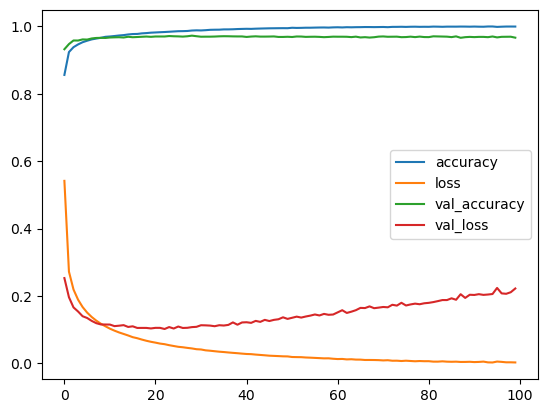

In [42]:
# First, let's plot the 'history_df' DataFrame to show training accuracy and loss
# and validation accuracy and loss
history_df.plot()
plt.show()

To better visualize how accuracy and loss change together, let's plot them on separate y-axes using a dual-axis chart.

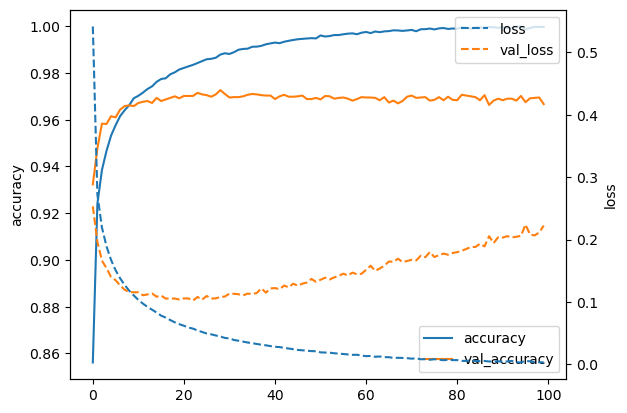

In [45]:
# Plot training and validation accuracy on the left y-axis
history_df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")

# Plot training and validation loss on the right y-axis, sharing the same x-axis (epochs)
history_df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.gca().twinx())
plt.ylabel("loss")

# Display the combined plot
plt.show()

We care about training results to check if our model is actually learning, but validation results are what matter for real-world performance -- for determining if our model we generalize to new, unseen data. Validation is king.

Based on this plot, we can see that **the best validation results are achieved at around 20 epochs** -- after that, the validation loss starts to rise, signaling overfitting. This is the point where we should consider using early stopping.

## Evaluate the advanced model on the test set

In [47]:
# Evaluate the model on the test set
score = model_100.evaluate(X_test, y_test, verbose=0)

# Display the Test Loss and Test Accuracy
print("Test Loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test Loss: 0.230
Test Accuracy: 0.963


Based on out plot, we can see that the test loss is higher than we'd like -- corresponding with about 100 epochs, not arounf 20. But the test accuracy is actually exactly what we'd expect to see. **The big takeway**: more epochs does't necessarily lead better results. It's crucial to know when to implement early stopping.

## Combine Keras and scikit-learn to run GridSearchCV

Next, we'll explore how to use **Keras** *and* **scikit-learn** to use **GridSearchCV** and improve the performance of our deep learning neural netwroks.

In [57]:
# Start by installing scikeras
!pip install scikeras

# Then, import the KerasClassifier and KerasRegressor using the built-in wrapper for scikit-learn
from scikeras.wrappers import KerasClassifier, KerasRegressor

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define a function to build and compile the Keras model
# Note: We do this because scikit-learn's KerasClassifier expects a function that returns a compiled model, and
# GridSearchCV will call this function to create a new model each time it tries a different set of parameters
# Also note' This is the same model we built earlier
def make_model(hidden_size=32, optimizer="adam"):
    model = Sequential([
        Dense(hidden_size, input_shape=(784,), activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# Put the model inside the KerasClassifier
clf = KerasClassifier(model=make_model, optimizer="adam", epochs=1, verbose=0)


# Build the parameter grid, specifying the number of epochs and hidden layer sizes
# Note: As always, we are setting up a dictionary of hyperparameters to search over
param_grid = {"epochs": [1, 5, 10],
    "model__hidden_size": [32, 64, 256]}

# Build the grid using the above classifier and parameter grid
# Note: We have complied 9 different combinations
grid = GridSearchCV(clf, param_grid=param_grid, return_train_score=True)

Time to fit the grid on the training set.

In [58]:
# Fit -- or train -- the grid on the training set
grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwa

GridSearchCV(estimator=KerasClassifier(model=<function make_model at 0x32538b7e0>, optimizer='adam', verbose=0),
             param_grid={'epochs': [1, 5, 10],
                         'model__hidden_size': [32, 64, 256]},
             return_train_score=True)

## Visualize the results and evaluate on the test set

Now that we fit the grid, let's begin this part of the process by creating a DataFrame.

In [63]:
# Create a DataFrame of the grid results
res = pd.DataFrame(grid.cv_results_)

In [64]:
# Display the results
res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_epochs,param_model__hidden_size,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.881421,0.104893,0.143354,0.008156,1,32,"{'epochs': 1, 'model__hidden_size': 32}",0.929833,0.922667,0.928083,...,0.927867,0.005055,9,0.931979,0.932958,0.935792,0.934187,0.934958,0.933975,0.001366
1,0.981503,0.024474,0.140259,0.001422,1,64,"{'epochs': 1, 'model__hidden_size': 64}",0.941417,0.941250,0.940000,...,0.941383,0.005510,8,0.946042,0.948479,0.948354,0.945063,0.949479,0.947483,0.001654
2,1.616233,0.079663,0.171067,0.012681,1,256,"{'epochs': 1, 'model__hidden_size': 256}",0.963750,0.955083,0.952833,...,0.957433,0.003850,6,0.968437,0.965042,0.962875,0.966708,0.964646,0.965542,0.001893
3,3.402628,0.396537,0.161254,0.038763,5,32,"{'epochs': 5, 'model__hidden_size': 32}",0.961667,0.957667,0.952917,...,0.956883,0.002886,7,0.971583,0.972042,0.967708,0.973771,0.968792,0.970779,0.002217
4,3.704108,0.082984,0.139917,0.003662,5,64,"{'epochs': 5, 'model__hidden_size': 64}",0.967500,0.968000,0.964250,...,0.966600,0.001861,4,0.981271,0.983521,0.980854,0.985167,0.982792,0.982721,0.001563
5,6.501634,0.117369,0.158568,0.000885,5,256,"{'epochs': 5, 'model__hidden_size': 256}",0.978250,0.974667,0.976250,...,0.974800,0.002292,2,0.993417,0.991583,0.993437,0.991771,0.989854,0.992013,0.001334
6,5.748961,0.090178,0.136184,0.000573,10,32,"{'epochs': 10, 'model__hidden_size': 32}",0.959833,0.961333,0.961083,...,0.961817,0.001960,5,0.979625,0.981896,0.983708,0.985875,0.981437,0.982508,0.002126
7,7.137215,0.392779,0.154805,0.032493,10,64,"{'epochs': 10, 'model__hidden_size': 64}",0.972667,0.972750,0.968667,...,0.970967,0.002432,3,0.993104,0.994271,0.991458,0.993812,0.993583,0.993246,0.000970
8,12.868942,0.453823,0.178338,0.038920,10,256,"{'epochs': 10, 'model__hidden_size': 256}",0.978000,0.975167,0.975500,...,0.975700,0.001199,1,0.995271,0.994750,0.997292,0.998479,0.995458,0.996250,0.001406


We can turn that DataFrame into a pivot table to see which combination of parameters provides the best result.

In [66]:
# Create the pivot table
res.pivot_table(index=["param_epochs", "param_model__hidden_size"],
                values=['mean_train_score', "mean_test_score"])

mean_test_score  mean_train_score
param_epochs param_model__hidden_size                                   
1            32                               0.927867          0.933975
             64                               0.941383          0.947483
             256                              0.957433          0.965542
5            32                               0.956883          0.970779
             64                               0.966600          0.982721
             256                              0.974800          0.992013
10           32                               0.961817          0.982508
             64                               0.970967          0.993246
             256                              0.975700          0.996250

Or, we can print the best parameters and best scores directly.

In [70]:
# Display the results
print("Best parameters found:", grid.best_params_)
print("Best mean validation score:", grid.best_score_)

Best parameters found: {'epochs': 10, 'model__hidden_size': 256}
Best mean validation score: 0.9757


There it is. The combination of 10 epochs and a hidden layer size of 256 gives the best result. **An important note**: in the context of GridSearchSV, `mean_test_score` refers to the validation score from running cross validation. 

To see how the model performs on unseen data, we'll evaluate on the test set.

In [68]:
# Evaluate the best model on the test set
grid.score(X_test, y_test)

0.9799

**Takeaway**: Interestingly, test accuracy exceeded that of validation -- sometimes you just get a friendly test split! It's like studying for a test, and -- by chance -- the questions on your *actual* exam were very similar to the ones you practiced. You’d do better, but it doesn’t mean you’re guaranteed to always get those easy questions!

Next, we'll build an even *more* complicated model to see if we can improve the performance will still not overfitting.

## Build (another) more complicated model

This neural network is more complicated -- and quite large. Plus, we'll use 20 epochs to train it.

In [76]:
# Build a more complicated model with two hidden layers -- each qith 1,024 hidden neurons, and relu 
# as the activation function
model_comp = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dense(1024, activation='relu'),

    # The output layer remains the same as before with 10 neurons for 10 possible outcome classes 
    # (of course, the numbers 0 to 9!), and use softmax to turn the outputs into probabilities
    Dense(10, activation='softmax'),
])

# The model, again gets the same solver, los function and metric
model_comp.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history = model_comp.fit(X_train, y_train, batch_size=128,
                    epochs=20, verbose=1, validation_split=.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8928 - loss: 0.3605 - val_accuracy: 0.9710 - val_loss: 0.0966
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9777 - loss: 0.0750 - val_accuracy: 0.9763 - val_loss: 0.0842
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9863 - loss: 0.0444 - val_accuracy: 0.9760 - val_loss: 0.0842
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9903 - loss: 0.0316 - val_accuracy: 0.9728 - val_loss: 0.0940
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9915 - loss: 0.0253 - val_accuracy: 0.9828 - val_loss: 0.0746
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9939 - loss: 0.0191 - val_accuracy: 0.9810 - val_loss: 0.0805
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9938 - loss: 0.0179 - val_accuracy: 0.9805 - val_loss: 0.0873
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9944 - loss: 0.0174 - val_accuracy

As we see, the training accuracy is going up and up. And the loss is going down and down. But the validation accuracy largely stays the same, and the validation loss bounces around but does not show a clear upward trend.

For this model, we’re not seeing obvious overfitting within 20 epochs. The model is still performing well on both the training and validation sets, so early stopping isn’t as urgent.

Now, we need to see how the model performs on the test set.

In [78]:
# Check the model on the test set
score = model_comp.evaluate(X_test, y_test, verbose=0)
score

[0.09765160828828812, 0.9815999865531921]

**Important note**: This test score -- just a tick under 0.98 -- is actually *better* than the best model that grid search found, which checked in at just under 0.98.

So, just how big was this model? Let's take a look.

In [79]:
# Display the model summary
model_comp.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_106 (Dense)               │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,591,072 (21.33 MB)

 Trainable params: 1,863,690 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,727,382 (14.22 MB)

Look at that! In this model, we trained **almost 2 million parameters**. As you might recall, the first neural network, which seemed big at the time, had nearly 25,000 parameters.

## Visualize the training process

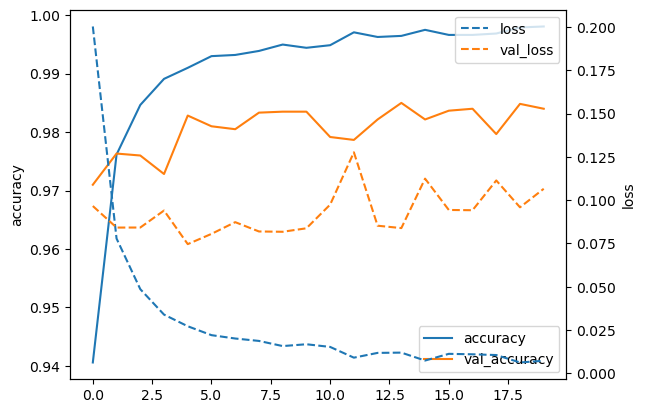

In [82]:
# Create the DataFrame and plot it
df = pd.DataFrame(history.history)
df[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

# Display the plot
plt.show()

Notice that **the performance on the validation set fluctuates quite a bit**. The accuracy peaks toward the end of the training process but the loss is at its lowest toward the beginning. When this happens, accuracy is often used as the go-to metric because it's more closely related to the final result.

## Use Dropout to deal with overfitting

Dropout is a simple, intuitive and powerful technique to prevent overfitting by randomly turning off neurons during training/
Most crucially, in this version of the model, every neuron has a 50% chance of getting dropped -- as we specify in the code below.

In [83]:
# Import Dropout
from keras.layers import Dropout

# Define the 'dropout' model
model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8375 - loss: 0.5135 - val_accuracy: 0.9698 - val_loss: 0.1013
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9533 - loss: 0.1473 - val_accuracy: 0.9738 - val_loss: 0.0867
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9659 - loss: 0.1122 - val_accuracy: 0.9787 - val_loss: 0.0769
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9722 - loss: 0.0903 - val_accuracy: 0.9822 - val_loss: 0.0639
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9746 - loss: 0.0806 - val_accuracy: 0.9807 - val_loss: 0.0656
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9747 - loss: 0.0798 - val_accuracy: 0.9812 - val_loss: 0.0633
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9779 - loss: 0.0691 - val_accuracy: 0.9838 - val_loss: 0.0582
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9813 - loss: 0.0596 - val_accuracy: 0.981

The key takeaway? **Dropout is doing its job**: it’s regularizing the model and keeping it from overfitting.

Next, let's take a look at the size of the model. As you'll notice, the number of parameters -- and, by extension, the complexity -- stays the same.

In [84]:
# Display the model summary
model_dropout.summary()

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_109 (Dense)               │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,591,072 (21.33 MB)

 Trainable params: 1,863,690 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,727,382 (14.22 MB)

Now, to plot.

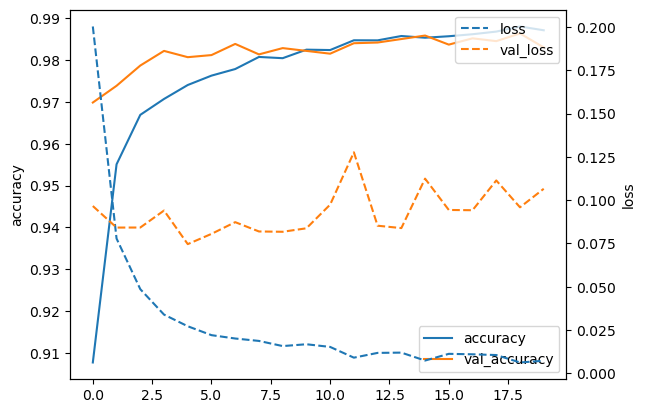

In [85]:
# Once again, let's plot the results
df_drop = pd.DataFrame(history_dropout.history)
df_drop[['accuracy', 'val_accuracy']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

# Display the plot
plt.show()

Let's evaluate the model on the test set.

In [88]:
# Check the model on the test set
score = model_dropout.evaluate(X_test, y_test, verbose=0)
score

[0.07035951316356659, 0.9829000234603882]

**Takeaway**: An accuracy of 0.983 -- **our best score yet, thanks to Dropout**, which allowed us to mitigate out ovefitting problem. What's more, our loss is also significantly lower than anything we've seen before.

What makes Dropout such a powerful and intuitive tool is the clear parallel to non-deep learning settings. Imagine you were working on a group project in business school or a project at work. Dropout is all about avoiding free riding. If you let one all-star do all the work while the rest of the group coasts, the whole team suffers -- no one else learns or contributes. Dropout is the ultimate anti-free rider move: by randomly "dropping" different neurons (read: team members), you never know who will be called to step up. 

So, everyone (or every neuron) has to be ready.